# Index

* <a href="#Caltech-experiments-MAD-vs-Spearman-plot">Caltech experiments MAD vs Spearman plot</a>
* <a href="#MAD-vs-Spearman-over-all-experiments">MAD vs Spearman over all experiments</a>
* <a href="#MAD-vs-Spearman-showing-Project-plot">MAD vs Spearman showing Project Plot</a>
* <a href="#All-RNA-Seq-MAD-vs-Pearson">All RNA-Seq MAD vs Pearson Plot</a>
* <a href="#All-RNA-Seq-Pearson-vs-Spearman">All RNA-Seq Pearson vs Spearman Plot</a>
* <a href="#Caltech-Human-Only">Caltech Human only MAD vs Spearman</a>

* Example Experiment Scatter plots
  * <a href="#Caltech-e11.5-forebrain-ENCSR160IIN-scatter">Caltech e11.5 forebrain ENCSR160IIN scatter</a>
  * <a href="#Gingeras-ENCSR000AAT-Scatter-plot">Gingeras ENCSR000AAT Scatter plot</a>
  * <a href="#Hardison-ENCSR661TLW-Scatter-plot">Hardison ENCSR661TLW Scatter plot</a>

# Introduction

As part of the ENCODE RNA-Seq working group we need to determine appropriate replicate condordance thresholds for our RNA-Seq experiments. 
ex

# Python Setup

In [1]:
from __future__ import print_function, division
import collections
import pandas
import numpy
import os
import sys
from bokeh.plotting import figure, ColumnDataSource, show
from bokeh.io import show, output_notebook
from bokeh.palettes import *
import bokeh.io

In [2]:
ROOT=os.path.expanduser("~diane/proj/encode3-curation")
if ROOT not in sys.path:
    sys.path.append(ROOT)

In [3]:
from compare_madqc_plots import setdefault_style, create_figure, experiment_scatter


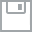
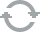
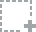
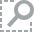
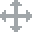
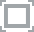
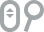
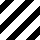
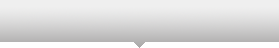
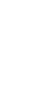
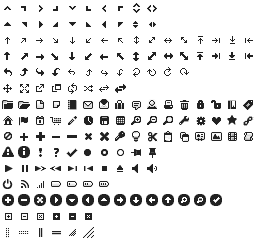
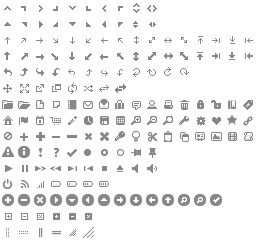
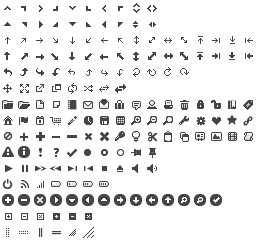
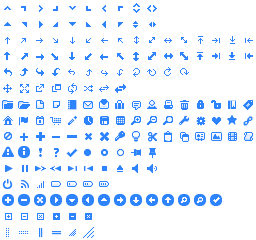
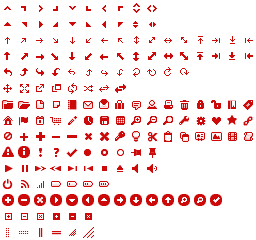
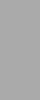
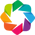
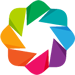

In [4]:
output_notebook()

In [32]:
%matplotlib inline

In [5]:
experiment_qc = pandas.read_csv(os.path.join(ROOT, 'compare-mad', 'experiment-mad-qc.csv'))

# Compare MAD vs Spearman over Caltech experiments

The colors give an indication of the starting amount. Greens are 10ng, yellowish is 50 or 30 cell pools, and reds are 10 cell or 13 pg data. Hover over a point for details.

Since we were generating experiments with wildly varying nucleic acid starting quantities, it seemed likely that would provide a good proxy for a worsening signal to noise ratio, and in the plot below, the 10ng data usually performs well in both Spearman and MAD scores while the pools and 13 pg experiments are less well correlated.

# Caltech experiments by starting quantity

In [6]:
caltech = experiment_qc[experiment_qc['lab'] == 'Barbara Wold, Caltech']

pandas.DataFrame([collections.Counter(caltech['starting'])], 
                           columns=['13 pg', '10 cells', '30 cells', '50 cells', '10 ng', '100 ng'],
                           index=['Total Experiments']).T

Total Experiments
13 pg                    15
10 cells                  1
30 cells                  8
50 cells                  4
10 ng                    66
100 ng                    2

## Prepare MAD vs Spearman over Caltech experiments plot

In [7]:
f = create_figure('MAD', 'Spearman', 'Caltech only')
extra = setdefault_style(fill_alpha=0.6)
for starting, color in [ ('100 ng', 0), ('10 ng', 1), ('50 cells', 2), ('30 cells', 3), ('10 cells', 4), ('13 pg', 5)]:
    f.circle('MAD', 'Spearman', legend=starting, color=RdYlGn6[color],
             source=ColumnDataSource(caltech[caltech['starting'] == starting]),
             **extra)

#Caltech experiments MAD vs Spearman plot

<a href="#Index">Back to Index</a>

In [8]:
show(f)

In [9]:
bokeh.io.save(obj=f, 
              filename='/tmp/caltech-mad-vs-spearman-starting.html',
              resources=bokeh.resources.CDN,
              title='Caltech MAD vs Spearman Starting Amount')

#MAD vs Spearman over all experiments

<a href="#Index">Back to Index</a>

Compare all RNA-Seq experiments that have MAD qc script scores. In this plot, color just indicates density.
Hover over a point for more details.

In [10]:
p = experiment_scatter(experiment_qc, 'MAD', 'Spearman', 'All RNA-Seq Experiments')
show(p)

#Number of experiments by Project

In [11]:
pandas.DataFrame([collections.Counter(experiment_qc['rfa'])], index=['Total Experiments']).T

Total Experiments
ENCODE2                       22
ENCODE2-Mouse                  3
ENCODE3                      260

#Prepare MAD vs Spearman showing Project plot

In [12]:
encode2 = experiment_qc[experiment_qc['rfa'] == 'ENCODE2']
encode2_mouse = experiment_qc[experiment_qc['rfa'] == 'ENCODE2-Mouse']
encode3 = experiment_qc[experiment_qc['rfa'] == 'ENCODE3']

f = create_figure('MAD', 'Spearman', 'All RNA-Seq')
extra = setdefault_style(fill_alpha=0.8)
f.circle('MAD', 'Spearman', source=ColumnDataSource(encode2), legend='ENCODE2 (22)', color='red', **extra)
f.circle('MAD', 'Spearman', source=ColumnDataSource(encode2_mouse), legend='ENCODE2-Mouse (3)', color='green', **extra)
f.circle('MAD', 'Spearman', source=ColumnDataSource(encode3), legend='ENCODE3 (260)', color='blue', **extra)

#MAD vs Spearman showing Project plot

<a href="#Index">back to index</a>

In [13]:
show(f)

In [14]:
bokeh.io.save(obj=f, 
              filename='/tmp/all-mad-vs-spearman-project.html',
              resources=bokeh.resources.CDN,
              title='All MAD vs Spearman by Project')

# Discussion

The eyeballing the Spearman correlation plots suggest to me that a MAD score of $<= 0.7$ is similar Spearman threshold of $ >= 0.9$. However the All RNA-Seq experiments plot show some outliers that show the two metrics behaving quite differently.

# Pearson comparisons

And to be complete the following plots show how Pearson performs compare compared to MAD and Spearman.

#All RNA-Seq MAD vs Pearson

<a href="#Index">Back to Index</a>

In [15]:
show(experiment_scatter(experiment_qc, 'MAD', 'Pearson', 'All RNA-Seq'))

#All RNA-Seq Pearson vs Spearman

<a href="#Index">Back to Index</a>

In [16]:
show(experiment_scatter(experiment_qc, 'Pearson', 'Spearman', 'All RNA_Seq'))

#Prepare Caltech Human Only Plot

In [17]:
our_experiments = [    
  'ENCSR388ZNJ','ENCSR368QPC','ENCSR225BBK','ENCSR137RHZ','ENCSR423XRG',
  'ENCSR415JJO','ENCSR157NLF','ENCSR313IUO','ENCSR900JSG','ENCSR000AEG',
  'ENCSR000AEH','ENCSR000AEQ','ENCSR000AEP','ENCSR000AJG','ENCSR000AJD',
]

caltech_human = caltech[caltech['experiment'].map(lambda x: x in our_experiments)]

In [18]:
f = create_figure('MAD', 'Spearman', 'Caltech human only')
extra = setdefault_style(fill_alpha=0.6)
for starting, color in [ ('100 ng', 0), ('10 ng', 1), ('50 cells', 2), ('30 cells', 3), ('10 cells', 4), ('13 pg', 5), ('unknown', 0)]:
    f.circle('MAD', 'Spearman', legend=starting, color=RdYlGn6[color],
             source=ColumnDataSource(caltech_human[caltech_human['starting'].fillna('unknown') == starting]),
             **extra)


#Caltech Human Only

In [19]:
show(f)

#Pass Spearman

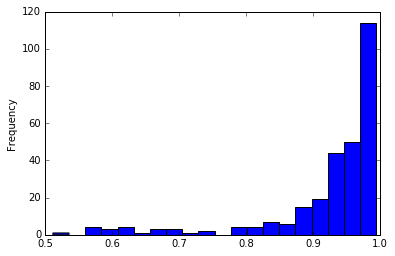

In [46]:
experiment_qc.Spearman.plot(kind='hist', bins=20)

In [47]:
len(experiment_qc.Spearman)

285

In [49]:
len(experiment_qc.Spearman[experiment_qc.Spearman > 0.9])

225

# Load 10ng Data

This was generated for a previous analysis I did.

In [20]:
store = pandas.HDFStore('comparison.h5', 'r')
tissue_10ng_fpkms = store.get('/tissue_10ng/fpkms')
tissue_10ng_scores = store.get('/tissue_10ng/fpkm_scores')
tissue_10ng_labels = store.get('/tissue_10ng/labels')
store.close()
rep1 = list(tissue_10ng_fpkms.keys())[0]
rep2 = list(tissue_10ng_fpkms.keys())[1]

In [21]:
rep1

'ENCLB835LVO'

# Define Scatter plot

This combines generating the M A matrix with making a plot.

In [22]:
def rafa_plot(matrix, rep1, rep2, labels=None):
    if labels is not None:
        xname = labels[rep1]
        yname = labels[rep2]
    else:
        xname = rep1
        yname = rep2

    eitherzero = (matrix[rep1] == 0) | (matrix[rep2] == 0)
    replz1 = numpy.log2(matrix[rep1][eitherzero != True])
    replz2 = numpy.log2(matrix[rep2][eitherzero != True])

    M = replz1 - replz2
    A = (replz1 + replz2) / 2.0
    Acutoff = 0

    spikes = numpy.asarray([ x.startswith('gSpike') for x in replz1.index ])
    filtered = A < Acutoff
    normal = (spikes == False) & (filtered == False)

    f = figure(title="{} v {}".format(xname, yname),
              x_range=[-8, 25], y_range=[-8, 25])
    f.cross(replz1[normal], replz2[normal], color='blue', fill_alpha=0.2, line_alpha=0.4)
    f.circle(replz1[spikes], replz2[spikes], color='black', fill_alpha=0.8, line_alpha=0.4)
    f.cross(replz1[filtered], replz2[filtered], color='red', fill_alpha=0.2, line_alpha=0.4)
    return f

#Caltech e11.5 forebrain ENCSR160IIN scatter

<a href="#Index">Back to index</a>

<table><tr><td>Experiment</td><td>MAD</td><td>Spearman</td></tr>
<tr><td>ENCSR160IIN</td><td>0.175</td><td>0.992246</td></tr></table>

In [23]:
show(rafa_plot(tissue_10ng_fpkms, rep1, rep2, tissue_10ng_labels))

#Prepare Gingeras ENCSR000AAT Scatter plot

In [24]:
gingeras1 = pandas.read_csv('https://www.encodeproject.org/files/ENCFF666CRI/@@download/ENCFF666CRI.tsv', usecols=[0,6], index_col=0, sep='\t')
gingeras2 = pandas.read_csv('https://www.encodeproject.org/files/ENCFF344KCP/@@download/ENCFF344KCP.tsv', usecols=[0,6], index_col=0, sep='\t')
gingeras = pandas.merge(gingeras1, gingeras2, left_index=True, right_index=True)
gingeras.columns = ['ENCFF666CRI', 'ENCFF344KCP']

#Gingeras ENCSR000AAT Scatter plot

<a href="#Index">back to index</a>

<table><tr><td>Experiment</td><td>MAD</td><td>Spearman</td></tr>
<tr><td>ENCSR000AAT</td><td>1.2</td><td>0.92</td></tr></table>


In [25]:
show(rafa_plot(gingeras, 'ENCFF666CRI', 'ENCFF344KCP'))

#Prepare Hardison ENCSR661TLW Scatter plot

In [26]:
hardison1 = pandas.read_csv('https://www.encodeproject.org/files/ENCFF276UQP/@@download/ENCFF276UQP.tsv', usecols=[0,6], index_col=0, sep='\t')
hardison2 = pandas.read_csv('https://www.encodeproject.org/files/ENCFF507VSO/@@download/ENCFF507VSO.tsv', usecols=[0,6], index_col=0, sep='\t')
hardison = pandas.merge(hardison1, hardison2, left_index=True, right_index=True)
hardison.columns = ['ENCFF276UQP', 'ENCFF507VSO']

#Hardison ENCSR661TLW Scatter plot
<a href="#Index">Back to index</a>
<table><tr><td>Experiment</td><td>MAD</td><td>Spearman</td></tr>
<tr><td>ENCSR661TLW</td><td>0.425</td><td>0.860</td></tr></table>

In [27]:
show(rafa_plot(hardison, 'ENCFF276UQP', 'ENCFF507VSO'))